#### Problem 2 - Logistic Regression and Linear Discrimant Analysis (LDA)

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style('whitegrid')
#sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')

##### Data Dictionary

In [2]:
dictionary = pd.read_excel('data dictionary holiday package.xlsx')

In [3]:
dictionary

,Variable Name,Description
0,Holiday_Package,Opted for Holiday Package yes/no?
1,Salary,Employee salary
2,age,Age in years
3,edu,Years of formal education
4,no_young_children,The number of young children (younger than 7 y...
5,no_older_children,Number of older children
6,foreign,foreigner Yes/No


#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [4]:
# Importing the dataset
df = pd.read_csv('Holiday_Package.csv')

In [5]:
# checking the dataset
df

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [6]:
# dropping the first column which does not add any value for our analysis. 
df = df.drop('Unnamed: 0', axis=1)
df

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [7]:
# checking the number of rows and columns
df.shape

(872, 7)

In [8]:
# checking the basic info of the dataset like no of observations, non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [9]:
# checking for missing values
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [10]:
# checking if there are duplicate values in the dataset
print('There are', df.duplicated().sum(), 'duplicate values in the dataset')

There are 0 duplicate values in the dataset


#### Descriptive Statistics - Inference

1. The dataset has 872 rows and 8 columns. Since we have removed the first column 'Unnamed: 0' we are now left with 7 columns. 
2. As per the info we can see that there are Zero null value counts. There are 5 integer and 2 object variable data types. 
3. There are NO missing values in the given dataset. 
4. There are NO duplicate values in the dataset.

#### Summary Statistics

In [11]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95], include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,90%,95%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,71115.9,84677.05,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,55.0,58.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,13.0,14.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,1.0,2.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,2.0,3.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above summary statistics, below are the observations:

1. Out of 872 employees 471 employees have NOT opted for the holiday package which explains why the company is trying to predict whether an employee will opt or not.  
2. The average employee salary is 47729.17 whereas median salary is 41903.5 with a maximum salary of 236961.0. Looks like this is a right skewed distribution. Upto 95% of the data is below the salary of 84677.05 which suggests that there might be outliers which is again natural. There might be employees who are working for more than 25 yrs with a high salary which explains the skewness in the data.  
3. Employee age ranges from a minimum of 20 yrs to a maximum of 62 yrs. The average and the median age is 39 yrs. Hence this seems to be normally distributed which is also naturally true. 
4. Years of formal education range from a minimum of 1 yr to a maximum of 21 yrs. The mean/median years of education is 9 yrs. However it raises sufficient suspicions on the minimum 1 yr education. Whether this is incorrect data entry or something correct should be validated by tours and travel agency. However we will keep it as is for now.
5. No of young children (younger than 7 yrs) range from 0 to 3 which suggests that none of the employees have more than 3 children (younger than 7 yrs). 
6. No of older children range from 0 to 6. Adding to it 95% of the data shows that no of older children are below 3. Hence we might see outliers in this attribute. 
7. Out of 872 employees we have 656 employees who are NOT foreigners. Hence there is a balance of 85:15 ratio of domestic and foreign employees.  

#### Exploratory Data Analysis (EDA)

#### Univariate Analysis

##### Countplots

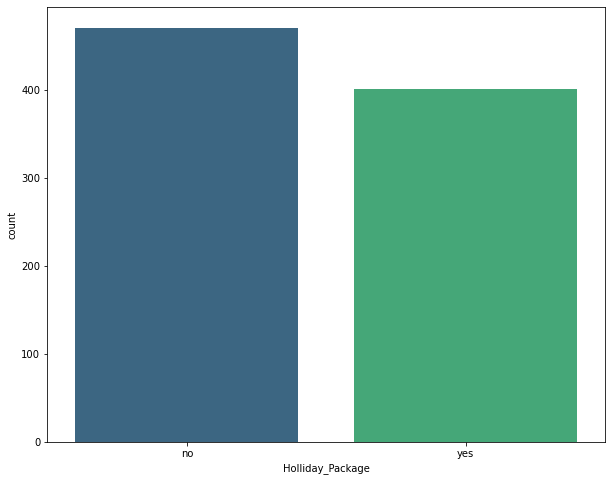

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(df['Holliday_Package'], palette='viridis');

From the above we can see that majority of the employees have NOT opted for a holiday package. 

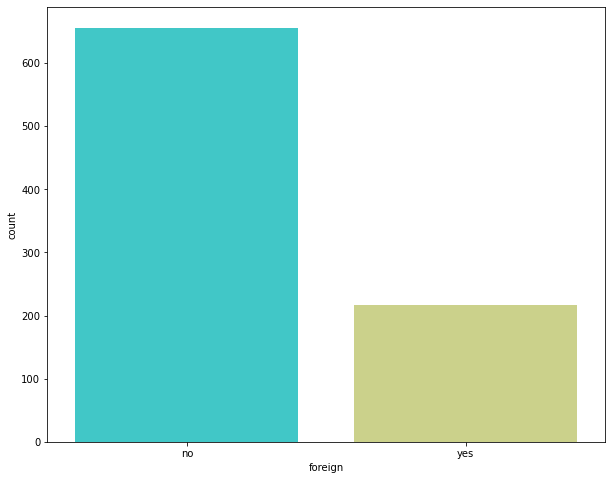

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(df['foreign'], palette='rainbow');

As explained earlier, majority of the employees are domestic. We have less than half of employees who are foreigners. 

#### Bivariate Analysis

##### Boxplots

In [14]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

##### Comparison with respect to Holiday Package

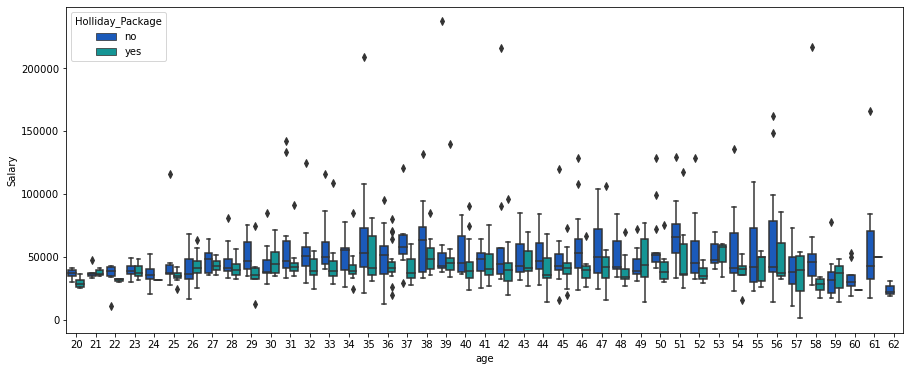

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(x='age', y='Salary',data=df, hue='Holliday_Package', palette='winter');
plt.show()

From the above plot we can see that salary is centered around the range of 30 yrs to 50 yrs of age. Employees who are more than 50 yrs have opted for holiday package which suggests that they are in the verge of retiring and hence are taking a break from their career. 

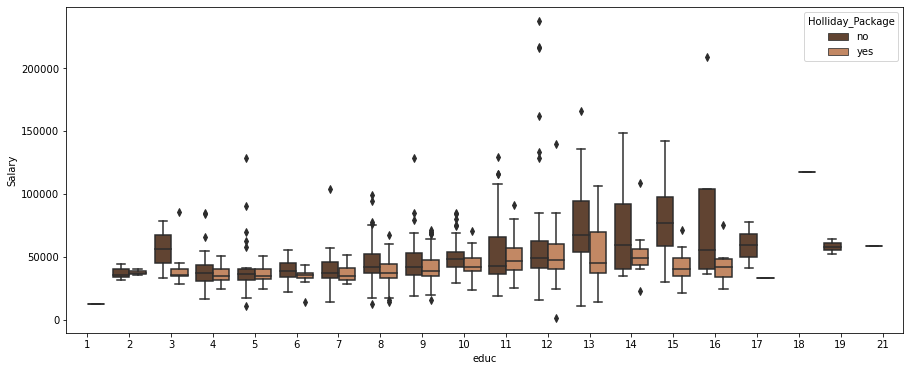

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(x='educ', y='Salary',data=df, hue='Holliday_Package', palette='copper');
plt.show()

Employees who have completed 13yrs to 16yrs are the highest in number. Some of the employees with 12 yrs education are getting exuberant higher salaries which are evident as outliers seen in the above plot.

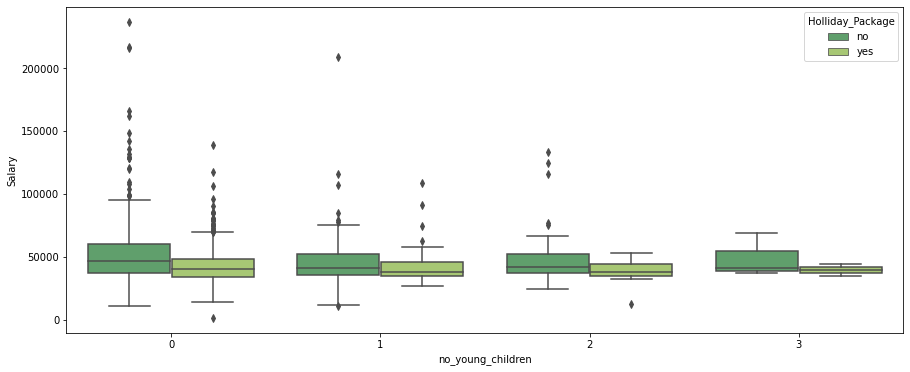

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(x='no_young_children', y='Salary',data=df, hue='Holliday_Package', palette='summer');
plt.show()

Employees who have NO younger children (younger than 7 yrs) have a higher salary range which also extends beyond 2 lakh whereas employees who have 3 children are the least with salary between 50,000 to 100000. 

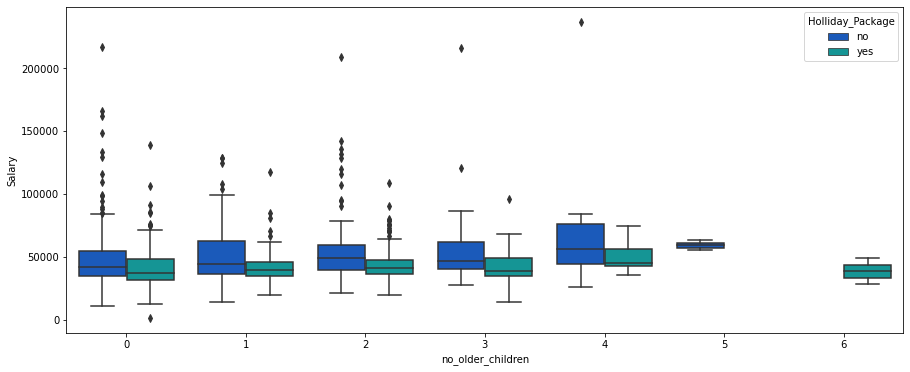

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x='no_older_children', y='Salary',data=df, hue='Holliday_Package', palette='winter');
plt.show()

Similarly employees who have NO older children have a higher salary range. However the median salary range remains almost same for most of the employees who have older children. 

##### Comparison with respect to Foreign

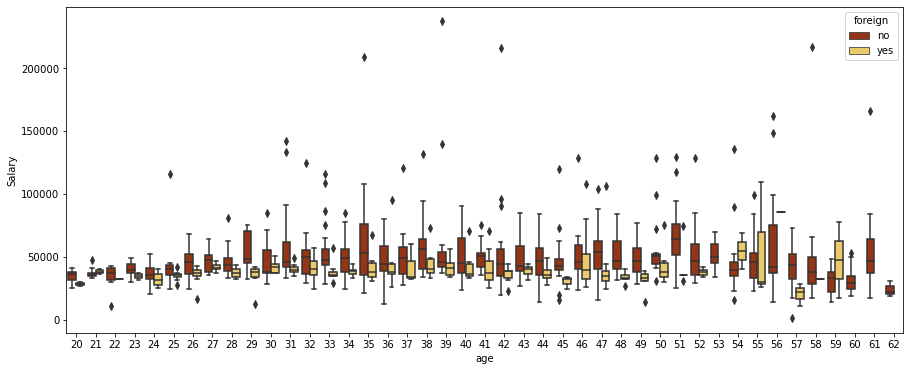

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x='age', y='Salary',data=df, hue='foreign', palette='afmhot');
plt.show()

Employees who have not opted for holiday package are more in numbers but we can see outliers across range of age. Non-foreign employees are higher in number. 

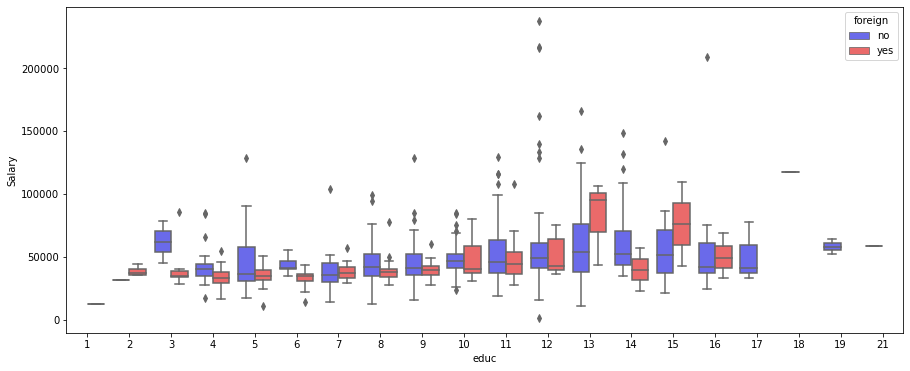

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x='educ', y='Salary',data=df, hue='foreign', palette='seismic');
plt.show()

Employees with 11yrs to 17yrs of education are more in numbers which indicates that they are mostly under graduates or post graduates. Employees who are non-foreign with 12 yrs of education have the highest salary range.

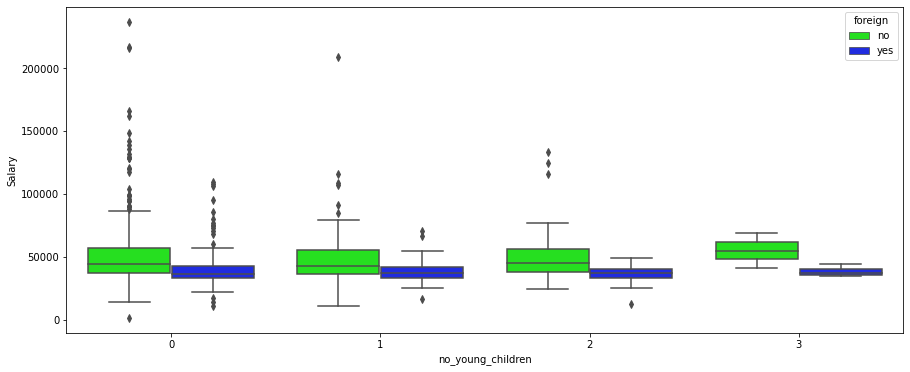

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x='no_young_children', y='Salary',data=df, hue='foreign', palette='hsv');
plt.show()

Employees who have NO younger children have a higher salary range. Non foreign employees are getting more salary compared to foreign employees. 

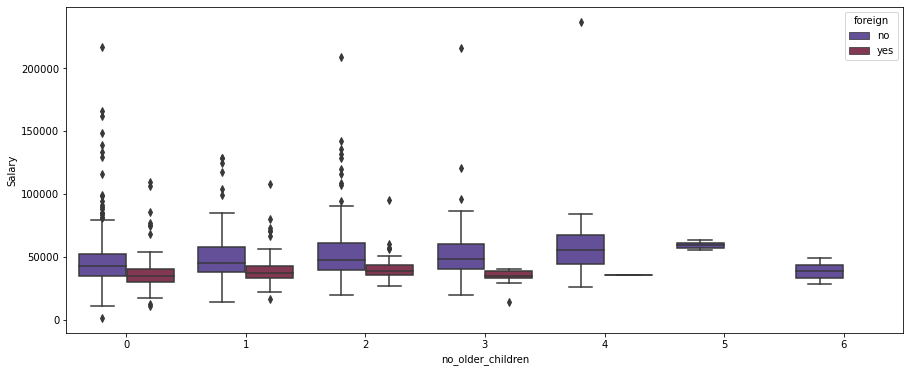

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(x='no_older_children', y='Salary',data=df, hue='foreign', palette='twilight');
plt.show()

Employees who have older children between 0 to 3 have a higher salary range whereas those who have more than 3 older children are in the moderate salary range. Again non foreign employees are higher. 

In [23]:
df_numerical = df[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]
df_numerical

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2
...,...,...,...,...,...
867,40030,24,4,2,1
868,32137,48,8,0,0
869,25178,24,6,2,0
870,55958,41,10,0,1


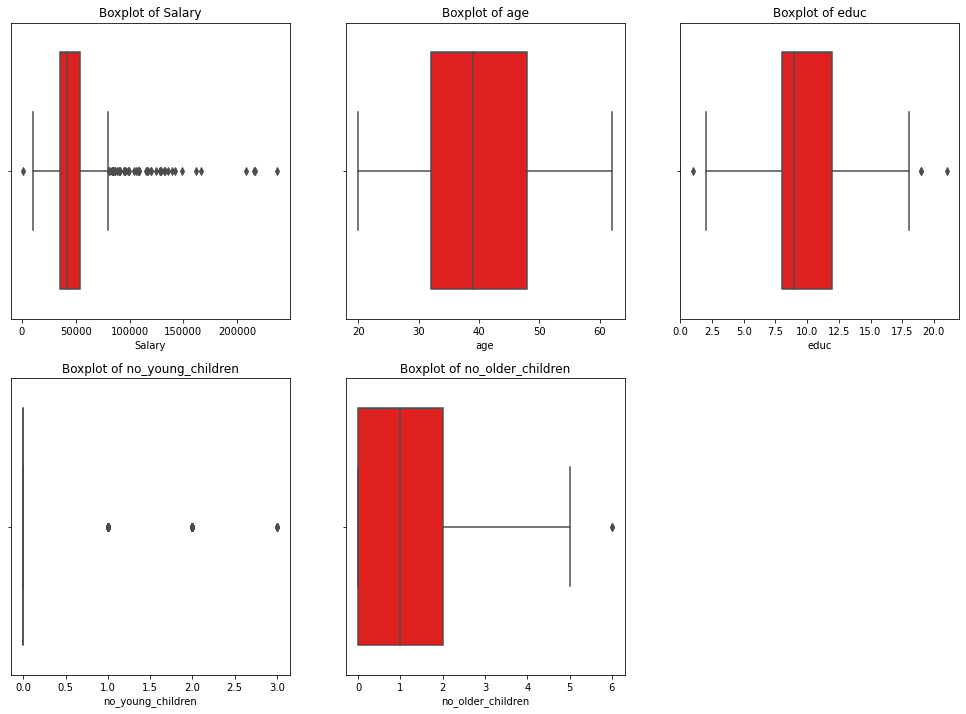

In [24]:
plt.figure(figsize = (17,12))
feature = df_numerical.columns
for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df_numerical[feature[i]], data=df_numerical, color='r');
    plt.title('Boxplot of {}'.format(feature[i]))

##### Distribution Plots

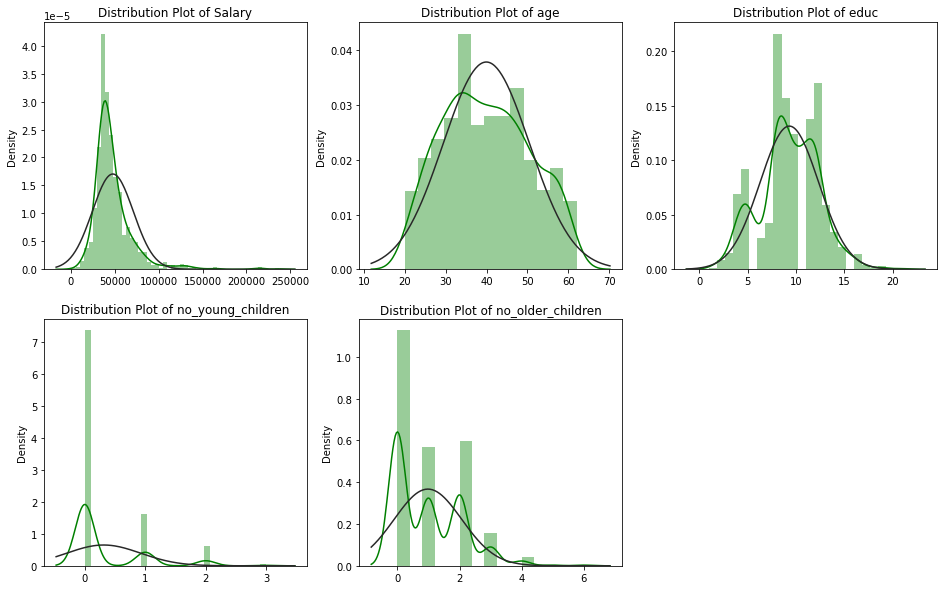

In [25]:
from scipy.stats import norm
plt.figure(figsize=(16,10))
feature = df_numerical.columns
for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    sns.distplot(x=df[feature[i]], color='g', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature[i]))

From the above distribution plots we can infer the below:

1. Age is normally distributed. 
2. Education is normally distributed with multiple peaks.
3. Salary is right skewed distribution. 
4. No of young children is right skewed distribution with multiple peaks.
5. No of older children is right skewed distribution with multiple peaks. 

##### Skewness and Kurtosis

In [26]:
for columns in df_numerical.columns:
    print('Skewness of {} is'.format(columns), round(df_numerical[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_numerical[columns].kurt(),2))

Skewness of Salary is 3.1
Kurtosis of Salary is 15.85
Skewness of age is 0.15
Kurtosis of age is -0.91
Skewness of educ is -0.05
Kurtosis of educ is 0.01
Skewness of no_young_children is 1.95
Kurtosis of no_young_children is 3.11
Skewness of no_older_children is 0.95
Kurtosis of no_older_children is 0.68


The skewness in Salary and no_young_children is clearly explained from the above values. Skewness values closer to Zero indicate they are normally distributed. 

As per Fisher’s definiton, the kurtosis of the normal distribution is zero. The distribution with a higher kurtosis has a heavier tail. In this case Salary and no_young_children have a heavier tail which is also evident from the distribution plots. Kurtosis values closer to Zero indicate they are normally distributed.

##### Pairplot

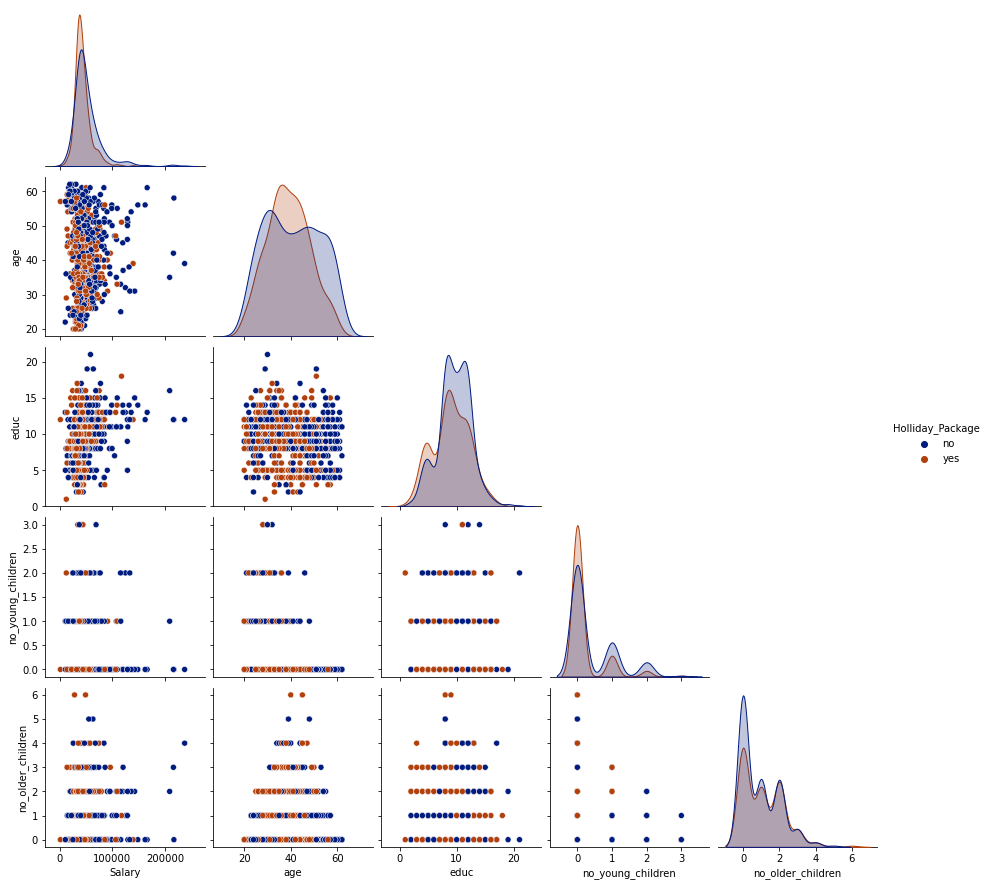

In [27]:
sns.pairplot(df, hue = 'Holliday_Package', corner=True, palette='dark', diag_kind='kde');

Above pairplot show that none of the variables are correlated. We will also validate the same in the correlation heatmap. The scattered data points clearly indicate that employees who have NOT opted for package are more in numbers.

##### Correlation Heatmap

In [28]:
corr = df.corr()
round(corr,2)

,Salary,age,educ,no_young_children,no_older_children
Salary,1.00,0.07,0.33,-0.03,0.11
age,0.07,1.00,-0.15,-0.52,-0.12
educ,0.33,-0.15,1.00,0.10,-0.04
no_young_children,-0.03,-0.52,0.10,1.00,-0.24
no_older_children,0.11,-0.12,-0.04,-0.24,1.00


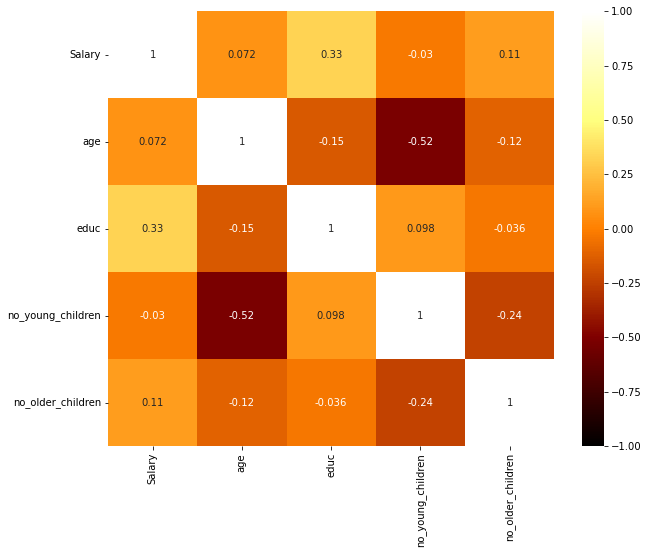

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='afmhot');

Correlation heatmap clearly evidences that there exists NO correlation between the attributes. However age and no_young_children have a less than moderate negative relationship with a correlation coefficient of -0.52 which can be considered as trivial. Correlation values are always between 1 and -1. Those which are closer to 1 are positively correlated and those which near -1 are negatively correlated. Values near to 0 have no correlation. 

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

##### Encoding Categorical variables

In [30]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes

In [31]:
df

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


##### Split the data into Train and Test samples

In [33]:
x = df.drop('Holliday_Package',axis=1)
y = df[['Holliday_Package']]

In [34]:
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [35]:
y.head()

,Holliday_Package
0,0
1,1
2,0
3,0
4,0


In [36]:
print(x.shape)
print(y.shape)

(872, 6)
(872, 1)


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [39]:
y_train.value_counts(normalize=True)

Holliday_Package
0                   0.563934
1                   0.436066
dtype: float64

In [40]:
y_test.value_counts(normalize=True)

Holliday_Package
1                   0.515267
0                   0.484733
dtype: float64

#### Logistic Regression using Scikit Learn

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, classification_report, roc_auc_score, roc_curve

#### Model 1 - Confusion Matrix and Classification Report

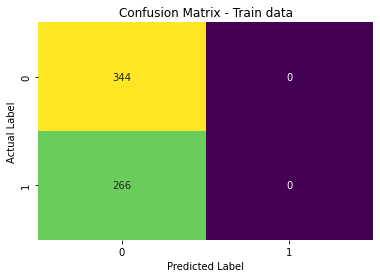

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       344
           1       0.00      0.00      0.00       266

    accuracy                           0.56       610
   macro avg       0.28      0.50      0.36       610
weighted avg       0.32      0.56      0.41       610



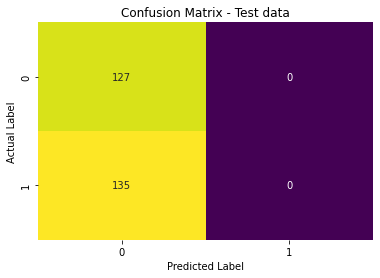

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       127
           1       0.00      0.00      0.00       135

    accuracy                           0.48       262
   macro avg       0.24      0.50      0.33       262
weighted avg       0.23      0.48      0.32       262



In [42]:
model1 = LogisticRegression(solver='lbfgs')
model1.fit(x_train, y_train)
ytrain_predict = model1.predict(x_train)
ytest_predict = model1.predict(x_test)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

##### AUC and ROC

AUC for Train data : 0.61
AUC for Test data : 0.58


Text(0.5, 1.0, 'ROC')

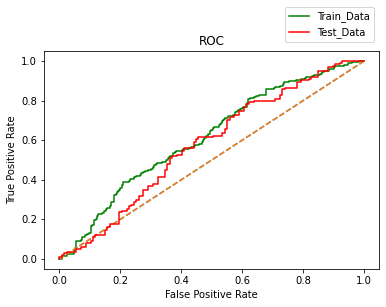

In [43]:
# predict probabilities
prob = model1.predict_proba(x_train)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC for Train data : %.2f' % auc)
# calculate the roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(train_fpr, train_tpr, color='green', label='Train_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')

# predict probabilities
prob = model1.predict_proba(x_test)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC for Test data : %.2f' % auc)
# calculate the roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(test_fpr, test_tpr, color='red', label='Test_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.title('ROC')

#### Model 2 - Confusion Matrix and Classification Report

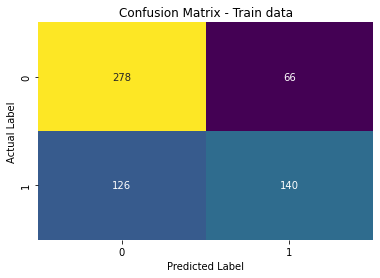

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.53      0.59       266

    accuracy                           0.69       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.69      0.68       610



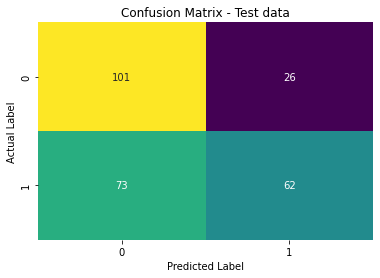

              precision    recall  f1-score   support

           0       0.58      0.80      0.67       127
           1       0.70      0.46      0.56       135

    accuracy                           0.62       262
   macro avg       0.64      0.63      0.61       262
weighted avg       0.64      0.62      0.61       262



In [44]:
model2 = LogisticRegression(solver='newton-cg')
model2.fit(x_train, y_train)
ytrain_predict = model2.predict(x_train)
ytest_predict = model2.predict(x_test)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

##### AUC and ROC

AUC for Train data : 0.74
AUC for Test data : 0.70


Text(0.5, 1.0, 'ROC')

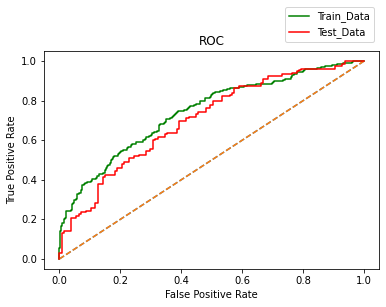

In [45]:
# predict probabilities
prob = model2.predict_proba(x_train)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC for Train data : %.2f' % auc)
# calculate the roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(train_fpr, train_tpr, color='green', label='Train_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')

# predict probabilities
prob = model2.predict_proba(x_test)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC for Test data : %.2f' % auc)
# calculate the roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(test_fpr, test_tpr, color='red', label='Test_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.title('ROC')

In [46]:
x = df.drop(['Holliday_Package','foreign'],axis=1)
y = df[['Holliday_Package']]
x.head()

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2


In [47]:
y.head()

,Holliday_Package
0,0
1,1
2,0
3,0
4,0


#### Model 3 - Confustion Matrix and Classificatin Report

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

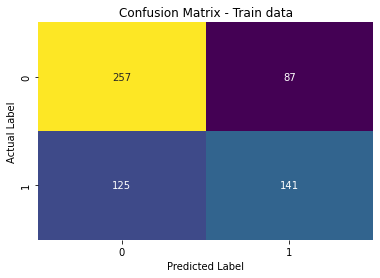

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       344
           1       0.62      0.53      0.57       266

    accuracy                           0.65       610
   macro avg       0.65      0.64      0.64       610
weighted avg       0.65      0.65      0.65       610



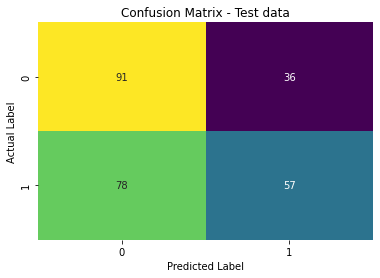

              precision    recall  f1-score   support

           0       0.54      0.72      0.61       127
           1       0.61      0.42      0.50       135

    accuracy                           0.56       262
   macro avg       0.58      0.57      0.56       262
weighted avg       0.58      0.56      0.56       262



In [49]:
model3 = LogisticRegression(solver='newton-cg')
model3.fit(x_train, y_train)
ytrain_predict = model3.predict(x_train)
ytest_predict = model3.predict(x_test)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

##### AUC and ROC

AUC for Train data : 0.71
AUC for Test data : 0.66


Text(0.5, 1.0, 'ROC')

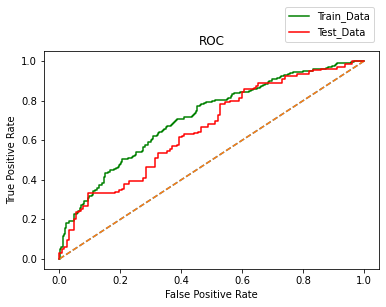

In [50]:
# predict probabilities
prob = model3.predict_proba(x_train)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC for Train data : %.2f' % auc)
# calculate the roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(train_fpr, train_tpr, color='green', label='Train_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')

# predict probabilities
prob = model3.predict_proba(x_test)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC for Test data : %.2f' % auc)
# calculate the roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(test_fpr, test_tpr, color='red', label='Test_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.title('ROC')

#### Logistic Regression using GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
x = df.drop('Holliday_Package',axis=1)
y = df[['Holliday_Package']]
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [54]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg','lbfgs'],
      'tol':[0.01,0.001]}
model4 = LogisticRegression(max_iter=1000,n_jobs=2)
grid_search = GridSearchCV(estimator = model4, param_grid = grid, cv = 2, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.01} 

LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   tol=0.01)


In [55]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

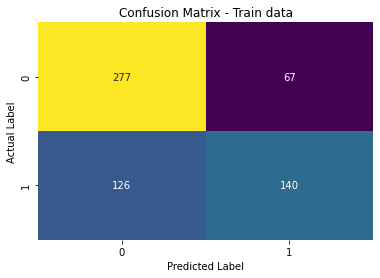

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.53      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



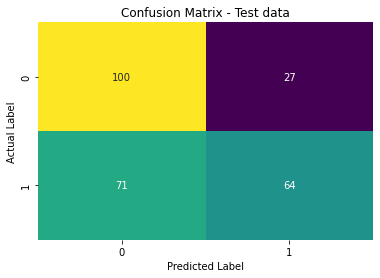

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       127
           1       0.70      0.47      0.57       135

    accuracy                           0.63       262
   macro avg       0.64      0.63      0.62       262
weighted avg       0.65      0.63      0.62       262



In [56]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

#### Outlier Treatment

In [57]:
df1 = pd.read_csv('Holiday_Package.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [58]:
df1_numerical = df1[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']]

In [59]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr = Q1-(1.5 * IQR)
    ur = Q3+(1.5 * IQR)
    return lr,ur

In [60]:
for column in df1_numerical.columns:
    lr,ur=remove_outlier(df1_numerical[column])
    df1_numerical[column]=np.where(df1_numerical[column]>ur,ur,df1_numerical[column])
    df1_numerical[column]=np.where(df1_numerical[column]<lr,lr,df1_numerical[column])

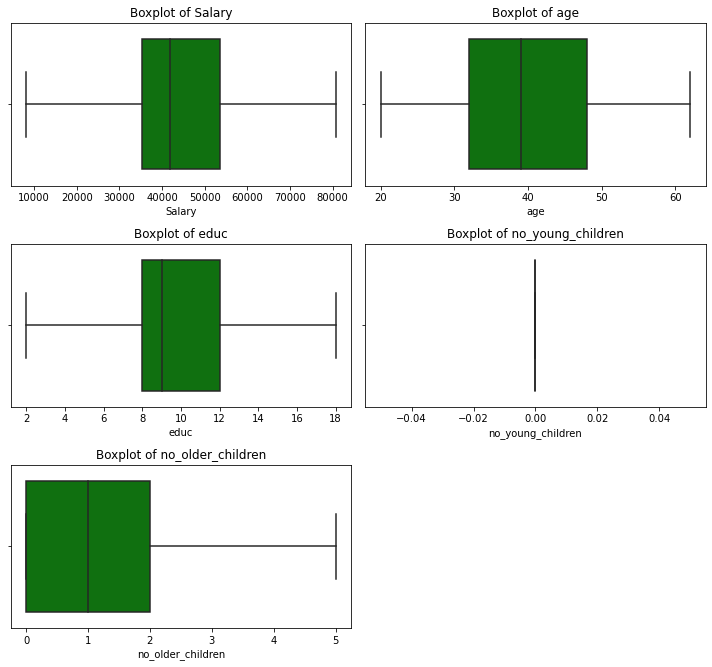

In [61]:
plt.figure(figsize = (10,12))
feature_list = df1_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df1_numerical[feature_list[i]], data=df1_numerical, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [62]:
df1_categorical = df1[['Holliday_Package', 'foreign']]
df1_categorical.head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


In [63]:
for column in df1_categorical.columns:
    if df1_categorical[column].dtype == 'object':
        df1_categorical[column] = pd.Categorical(df1_categorical[column]).codes

In [64]:
df1_categorical.head()

,Holliday_Package,foreign
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [65]:
df1 = pd.concat([df1_numerical,  df1_categorical], axis=1)
df1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package,foreign
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


#### Model 4 - Confusion Matrix and Classification Report

In [66]:
x = df1.drop('Holliday_Package',axis=1)
y = df1[['Holliday_Package']]

In [67]:
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0
2,58022.0,46.0,9.0,0.0,0.0,0
3,66503.0,31.0,11.0,0.0,0.0,0
4,66734.0,44.0,12.0,0.0,2.0,0


In [68]:
y.head()

,Holliday_Package
0,0
1,1
2,0
3,0
4,0


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

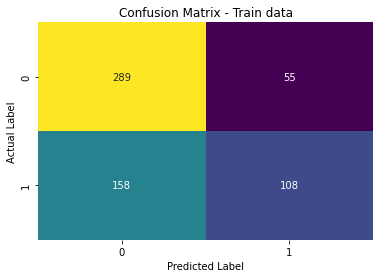

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       344
           1       0.66      0.41      0.50       266

    accuracy                           0.65       610
   macro avg       0.65      0.62      0.62       610
weighted avg       0.65      0.65      0.63       610



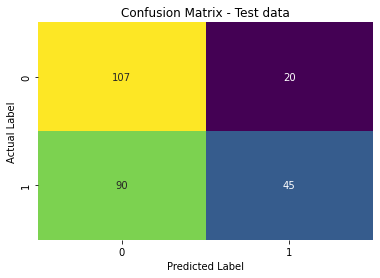

              precision    recall  f1-score   support

           0       0.54      0.84      0.66       127
           1       0.69      0.33      0.45       135

    accuracy                           0.58       262
   macro avg       0.62      0.59      0.56       262
weighted avg       0.62      0.58      0.55       262



In [70]:
model4 = LogisticRegression(solver='newton-cg')
model4.fit(x_train, y_train)
ytrain_predict = model4.predict(x_train)
ytest_predict = model4.predict(x_test)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

##### AUC and ROC

AUC for Train data : 0.68
AUC for Test data : 0.63


Text(0.5, 1.0, 'ROC')

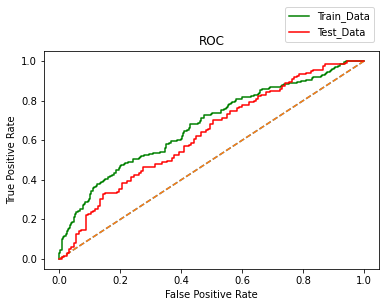

In [71]:
# predict probabilities
prob = model4.predict_proba(x_train)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC for Train data : %.2f' % auc)
# calculate the roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(train_fpr, train_tpr, color='green', label='Train_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')

# predict probabilities
prob = model4.predict_proba(x_test)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC for Test data : %.2f' % auc)
# calculate the roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(test_fpr, test_tpr, color='red', label='Test_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.title('ROC')

#### Logistic Regression using Stats Model

In [78]:
import statsmodels.formula.api as smf

In [84]:
df2 = pd.read_csv('Holiday_Package.csv')

In [85]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [86]:
df2 = df2.drop('Unnamed: 0', axis=1)
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [87]:
df2['Holliday_Package'] = pd.Categorical(df2['Holliday_Package']).codes
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,no
1,1,37207,45,8,0,1,no
2,0,58022,46,9,0,0,no
3,0,66503,31,11,2,0,no
4,0,66734,44,12,0,2,no


In [88]:
df2['foreign'] = pd.Categorical(df2['foreign']).codes
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


#### Model 5 

In [94]:
formula = 'Holliday_Package~Salary+age+educ+no_young_children+no_older_children+foreign'

In [95]:
model5 = smf.logit(formula=formula, data=df2)
results = model5.fit()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


In [96]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.1281
Time:                        21:39:23   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.

In [99]:
print(results.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.128     
Dependent Variable: Holliday_Package AIC:              1063.0693 
Date:               2021-10-24 21:55 BIC:              1096.4649 
No. Observations:   872              Log-Likelihood:   -524.53   
Df Model:           6                LL-Null:          -601.61   
Df Residuals:       865              LLR p-value:      1.0232e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          2.3259   0.5539  4.1992 0.0000  1.2403  3.4115
Salary            -0.0000   0.0000 -4.1694 0.0000 -0.0000 -0.0000
age               -0.0482   0.0091 -5.3143 0.0000 -0.0659 -0.0304
educ               0.0392   0.0293  

#### Model 6 - removing no_older_children

In [100]:
# removing no_older_children from the formula as it is not statistically significant
formula = 'Holliday_Package~Salary+age+educ+no_young_children+foreign'
model6 = smf.logit(formula=formula, data=df2)
results = model6.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.601574
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.1281
Time:                        22:08:02   Log-Likelihood:                -524.57
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.808e-31
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2705      0.516      4.403      0.000       1.260       3.281
Salary  

#### Model 7 - removing  educ and no_older_children

In [170]:
# removing educ from the formula as it is not statistically significant
formula = 'Holliday_Package~Salary+age+no_young_children+foreign'
model7 = smf.logit(formula=formula, data=df2)
results = model7.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.1265
Time:                        22:48:38   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
Salary  

#### Model 8 - GridSearchCV

In [171]:
x = df2.drop('Holliday_Package',axis=1)
y = df2[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
grid={'penalty':['l2','none'],
      'solver':['newton-cg','lbfgs'],
      'tol':[0.01,0.001]}
model8 = LogisticRegression(max_iter=1000,n_jobs=2)
grid_search = GridSearchCV(estimator = model8, param_grid = grid, cv = 2, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.01} 

LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   tol=0.01)


In [172]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

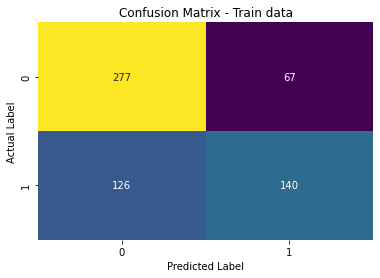

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.53      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



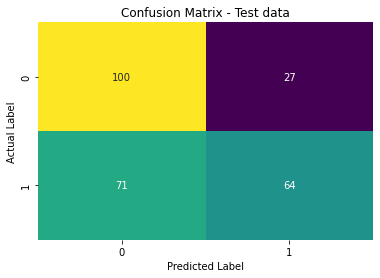

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       127
           1       0.70      0.47      0.57       135

    accuracy                           0.63       262
   macro avg       0.64      0.63      0.62       262
weighted avg       0.65      0.63      0.62       262



In [173]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

#### Model 9

In [174]:
x = df2.drop('Holliday_Package',axis=1)
y = df2[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
grid={'solver':['newton-cg', 'lbfgs'],
      'tol': [0.01, 0.001]}
model9 = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator = model9, param_grid = grid, cv = 3, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'newton-cg', 'tol': 0.01} 

LogisticRegression(max_iter=1000, solver='newton-cg', tol=0.01)


In [175]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

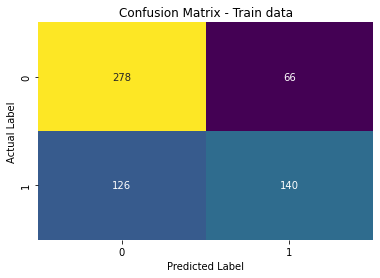

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.53      0.59       266

    accuracy                           0.69       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.69      0.68       610



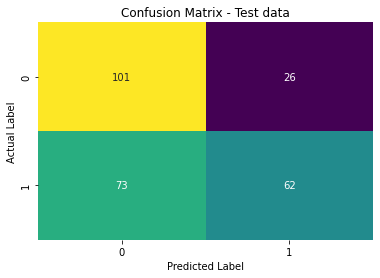

              precision    recall  f1-score   support

           0       0.58      0.80      0.67       127
           1       0.70      0.46      0.56       135

    accuracy                           0.62       262
   macro avg       0.64      0.63      0.61       262
weighted avg       0.64      0.62      0.61       262



In [176]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

#### Linear Discriminant Analysis (LDA)

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [178]:
x = df2.drop('Holliday_Package',axis=1)
y = df2[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

#### Model 10

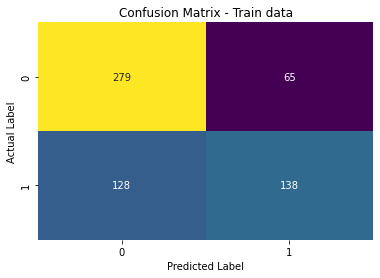

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.52      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.66      0.67       610
weighted avg       0.68      0.68      0.68       610



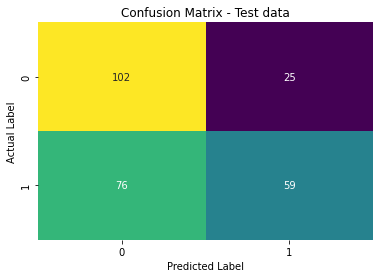

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       127
           1       0.70      0.44      0.54       135

    accuracy                           0.61       262
   macro avg       0.64      0.62      0.60       262
weighted avg       0.64      0.61      0.60       262



In [179]:
model10 = LinearDiscriminantAnalysis()
model10.fit(x_train, y_train)
ytrain_predict = model10.predict(x_train)
ytest_predict = model10.predict(x_test)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

##### AUC and ROC

AUC for Train data : 0.74
AUC for Test data : 0.70


Text(0.5, 1.0, 'ROC')

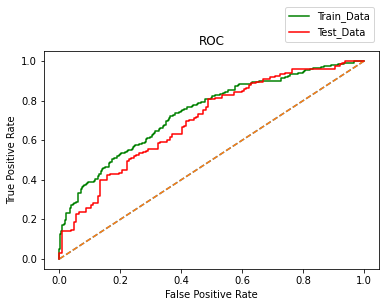

In [180]:
# predict probabilities
prob = model10.predict_proba(x_train)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC for Train data : %.2f' % auc)
# calculate the roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(train_fpr, train_tpr, color='green', label='Train_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')

# predict probabilities
prob = model10.predict_proba(x_test)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC for Test data : %.2f' % auc)
# calculate the roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(test_fpr, test_tpr, color='red', label='Test_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.title('ROC')

#### Model 11

In [181]:
x = df2.drop(['Holliday_Package', 'foreign'],axis=1)
y = df2[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

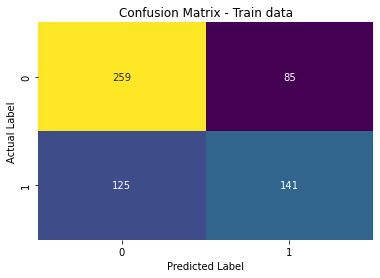

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       344
           1       0.62      0.53      0.57       266

    accuracy                           0.66       610
   macro avg       0.65      0.64      0.64       610
weighted avg       0.65      0.66      0.65       610



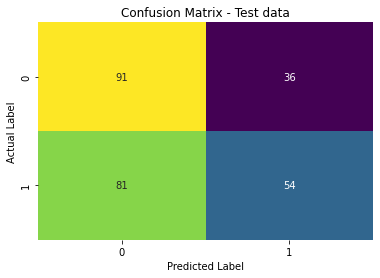

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       127
           1       0.60      0.40      0.48       135

    accuracy                           0.55       262
   macro avg       0.56      0.56      0.54       262
weighted avg       0.57      0.55      0.54       262



In [182]:
model11 = LinearDiscriminantAnalysis()
model11.fit(x_train, y_train)
ytrain_predict = model11.predict(x_train)
ytest_predict = model11.predict(x_test)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train data')
plt.show()
print(classification_report(y_train, ytrain_predict))
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test data')
plt.show()
print(classification_report(y_test, ytest_predict))

##### AUC and ROC

AUC for Train data : 0.71
AUC for Test data : 0.65


Text(0.5, 1.0, 'ROC')

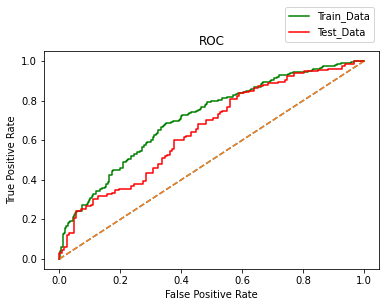

In [183]:
# predict probabilities
prob = model11.predict_proba(x_train)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC for Train data : %.2f' % auc)
# calculate the roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(train_fpr, train_tpr, color='green', label='Train_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')

# predict probabilities
prob = model11.predict_proba(x_test)
# taking only the probabilities of positive outcomes
prob = prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC for Test data : %.2f' % auc)
# calculate the roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, prob)
plt.plot([0,1],[0,1], linestyle='--');
plt.plot(test_fpr, test_tpr, color='red', label='Test_Data');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.title('ROC')

#### For Loop

In [191]:
df1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package,foreign
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Model Performance - Before Outlier Treatment

In [198]:
x = df1.drop('Holliday_Package',axis=1)
y = df1[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
model1 = LogisticRegression(solver='lbfgs')
model2 = LogisticRegression(solver='newton-cg')
model10 = LinearDiscriminantAnalysis()

models=[model1, model2, model10]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
        
pd.DataFrame({'Scores_Train': scores_train,'Scores_Test': scores_test},
            index=['Solver lbfgs','Solver newton-cg','LDA'])

,Scores_Train,Scores_Test
Solver lbfgs,0.563934,0.484733
Solver newton-cg,0.650820,0.580153
LDA,0.652459,0.583969


##### Removing foreign

In [199]:
x = df1.drop(['Holliday_Package', 'foreign'],axis=1)
y = df1[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
model1 = LogisticRegression(solver='lbfgs')
model2 = LogisticRegression(solver='newton-cg')
model10 = LinearDiscriminantAnalysis()

models=[model1, model2, model10]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
        
pd.DataFrame({'Scores_Train': scores_train,'Scores_Test': scores_test},
            index=['Solver lbfgs','Solver newton-cg','LDA'])

,Scores_Train,Scores_Test
Solver lbfgs,0.563934,0.484733
Solver newton-cg,0.603279,0.549618
LDA,0.600000,0.545802


#### Model Performance - Post Outlier Treatment

In [200]:
x = df2.drop('Holliday_Package',axis=1)
y = df2[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
model1 = LogisticRegression(solver='lbfgs')
model2 = LogisticRegression(solver='newton-cg')
model10 = LinearDiscriminantAnalysis()

models=[model1, model2, model10]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
        
pd.DataFrame({'Scores_Train': scores_train,'Scores_Test': scores_test},
            index=['Solver lbfgs','Solver newton-cg','LDA'])

,Scores_Train,Scores_Test
Solver lbfgs,0.563934,0.484733
Solver newton-cg,0.685246,0.622137
LDA,0.683607,0.614504


##### Removing foreign

In [201]:
x = df2.drop(['Holliday_Package', 'foreign'],axis=1)
y = df2[['Holliday_Package']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
model1 = LogisticRegression(solver='lbfgs')
model2 = LogisticRegression(solver='newton-cg')
model10 = LinearDiscriminantAnalysis()

models=[model1, model2, model10]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
        
pd.DataFrame({'Scores_Train': scores_train,'Scores_Test': scores_test},
            index=['Solver lbfgs','Solver newton-cg','LDA'])

,Scores_Train,Scores_Test
Solver lbfgs,0.563934,0.484733
Solver newton-cg,0.652459,0.564885
LDA,0.655738,0.553435


#### Comparison of Models and Inferences

Below are the observations based on model performance scores:

1.	Model has performed the best post outlier treatment. 
2.	62.21% accuracy scores are obtained for model which uses solver = “newton-cg” post outlier treatment. This is the best possible accuracy so far compared to other models. 
3.	61.45% accuracy scores are obtained for LDA model post outlier treatment which is the second best model. 
4.	The model predicts whether an employee will opt for a holiday package or not 62.21% accurately most of the times.
5.	However the data shows that there is a class balance between yes and no classes. 
6.	Model still needs to improve as 38.8% the model might predict incorrectly. 
7.	More data needs to be collected in order to build better models.
8.	Looks like the tours and travel company is providing holiday packages with exuberant prices without any discounts or offers which is why we see that most of the employees are not opting for the holiday package. They need to come up with different offers and schemes which are budget friendly so that more employees might opt for a holiday package.  